**CC25-CF098 - Machine Learning Engineer - Capstone Project_Coding Camp powered by DBS Foundation**

### Import Library/Package

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.2 MB/s eta 0:00:00


In [2]:
!pip install preprocessor==1.1.3

  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4474 sha256=c285e202cbb99c94066a0c0e281e3552b8ac4fab3af5362e65c7d75dd03628f0
  Stored in directory: /root/.cache/pip/wheels/a6/12/2f/aaf1da9ba2897857e56aa5f5dd3b5d6d0024b953cdf8bb6fd4
Successfully built preprocessor


In [3]:
# Core Python
import os
import re
import time
import pickle
import joblib
from tqdm import tqdm

# Data Handling
import numpy as np
import pandas as pd

# NLP & Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import preprocessor as p
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Tools
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Bidirectional, Input,
    GlobalMaxPooling1D, SimpleRNN
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

# NLTK Downloads
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Load Data

In [4]:
df = pd.read_csv('/content/Combined Data.csv')
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [5]:
df1 = pd.read_csv('/content/depression-anxiety.csv')
df1

,post,label,pernyataan
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...
...,...,...,...
7419,really want kill myselfim questioning long ter...,stress,Benar -benar ingin membunuh diri saya sendiri ...
7420,girlfriend keeps making comments redflagdear r...,anxiety,Pacar terus membuat komentar Redflagdear RSW P...
7421,running optionsmy life general going downhill ...,anxiety,Pilihan berjalan saya kehidupan umum menuruni ...
7422,need support dealing lot stupid shit piling ag...,stress,Butuh dukungan berurusan banyak hal bodoh yang...


In [6]:
df2 = pd.read_csv('/content/dataset_cleaned (2).csv')
df2

,statement,status,statement_length,statement_cleaned,statement_translated,statement_stemming
0,oh my gosh,Anxiety,10,oh my gosh,oh my gosh,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,trouble sleeping confused mind restless heart ...,kesulitan tidur bingung pikiran gelisah hati lagu,sulit tidur bingung pikir gelisah hati lagu
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,all wrong back off dear forward doubt stay in ...,salah mundur sayang keraguan tinggal gelisah g...,salah mundur sayang ragu tinggal gelisah gelisah
3,I've shifted my focus to something else but I'...,Anxiety,61,ive shifted my focus to something else but im ...,mengalihkan fokusku khawatir,alih fokus khawatir
4,"I'm restless and restless, it's been a month n...",Anxiety,72,im restless and restless its been a month now ...,im gelisah gelisah sebulan anak laki laki maks...,im gelisah gelisah bulan anak laki laki maksud
...,...,...,...,...,...,...
49164,Lorazepam side effect/after effect In the last...,Anxiety,784,lorazepam side effectafter effect in the last ...,efek samping lorazepam efek samping minggu men...,efek samping lorazepam efek samping minggu amb...
49165,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,selfishness i dont feel very good its like i d...,keegoisan dunia berpikir teman teman bahagia i...,egois dunia pikir teman teman bahagia im orang...
49166,Is there any way to sleep better? I can't slee...,Anxiety,85,is there any way to sleep better i cant sleep ...,tidur tidur obat malam membantu,tidur tidur obat malam bantu
49167,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,public speaking tips hi all i have to give a p...,tips berbicara publik hi presentasi kerja ming...,tips bicara publik hi presentasi kerja minggu ...


### Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(53043, 3)

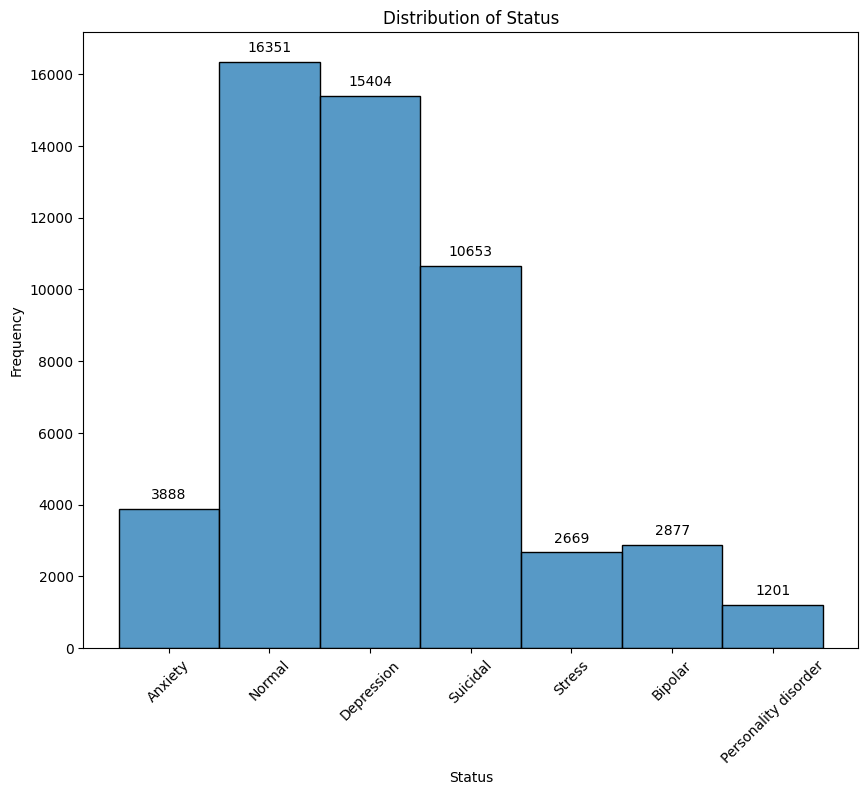

In [11]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.histplot(df['status'])
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [12]:
df = df.drop('Unnamed: 0', axis=1)
df['statement_length'] = df['statement'].fillna('').apply(len)
df[['statement', 'statement_length']].head()


,statement,statement_length
0,oh my gosh,10
1,"trouble sleeping, confused mind, restless hear...",64
2,"All wrong, back off dear, forward doubt. Stay ...",78
3,I've shifted my focus to something else but I'...,61
4,"I'm restless and restless, it's been a month n...",72


In [13]:
df['statement_length'].describe()

,statement_length
count,53043.000000
mean,574.764342
std,844.721094
min,0.000000
25%,77.000000
50%,313.000000
75%,748.000000
max,32759.000000


In [14]:
df[df['statement_length']==0]

,statement,status,statement_length
293,NaN,Anxiety,0
572,NaN,Anxiety,0
595,NaN,Anxiety,0
1539,NaN,Normal,0
2448,NaN,Normal,0
...,...,...,...
52838,NaN,Anxiety,0
52870,NaN,Anxiety,0
52936,NaN,Anxiety,0
53010,NaN,Anxiety,0


In [15]:
Q1 = df['statement_length'].quantile(0.25)

Q3 = df['statement_length'].quantile(0.75)

IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 77.0
Q3: 748.0
IQR: 671.0


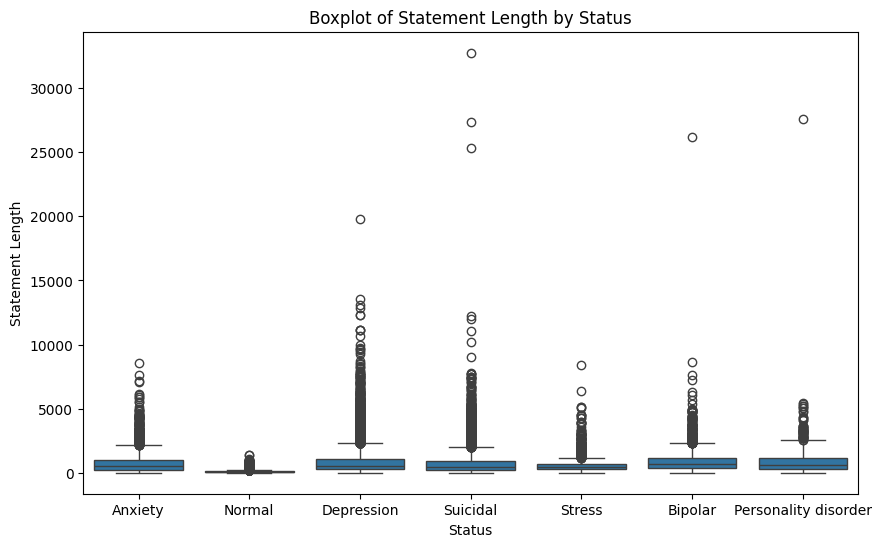

In [16]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df)
plt.title('Boxplot of Statement Length by Status')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

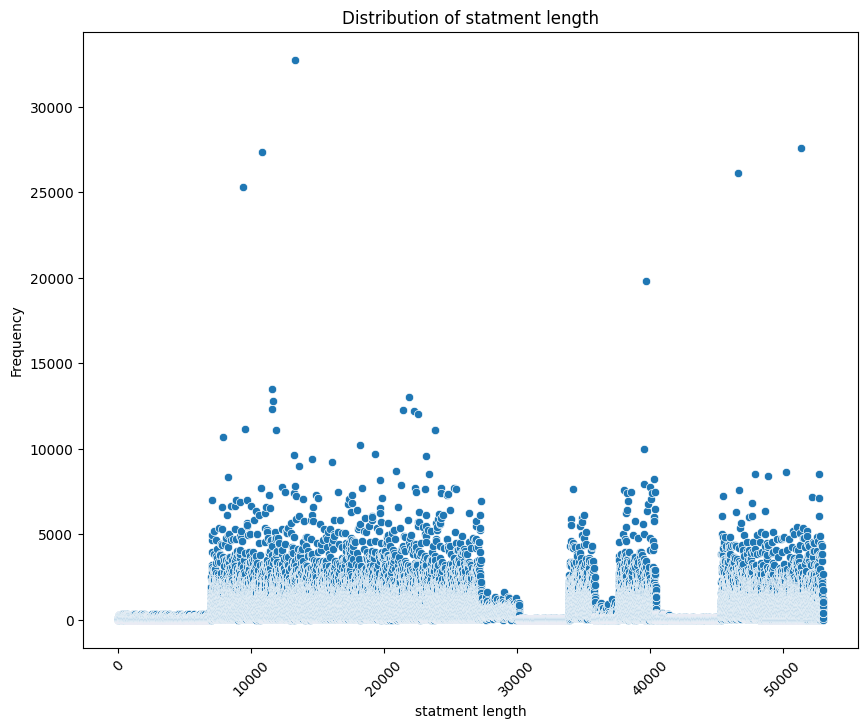

In [17]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Lower Bound for Outliers: -929.5
Upper Bound for Outliers: 1754.5
Shape of original dataframe: (53043, 3)
Shape of filtered dataframe (after removing outliers): (49507, 3)


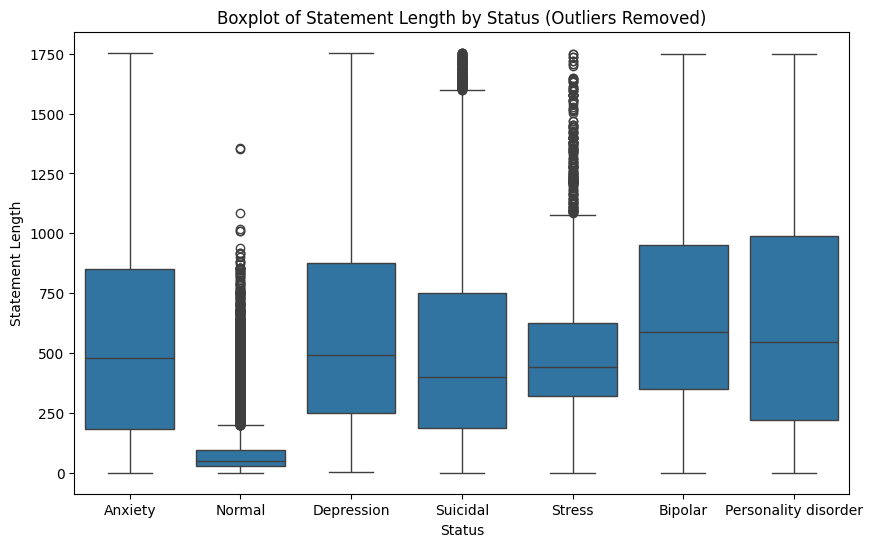

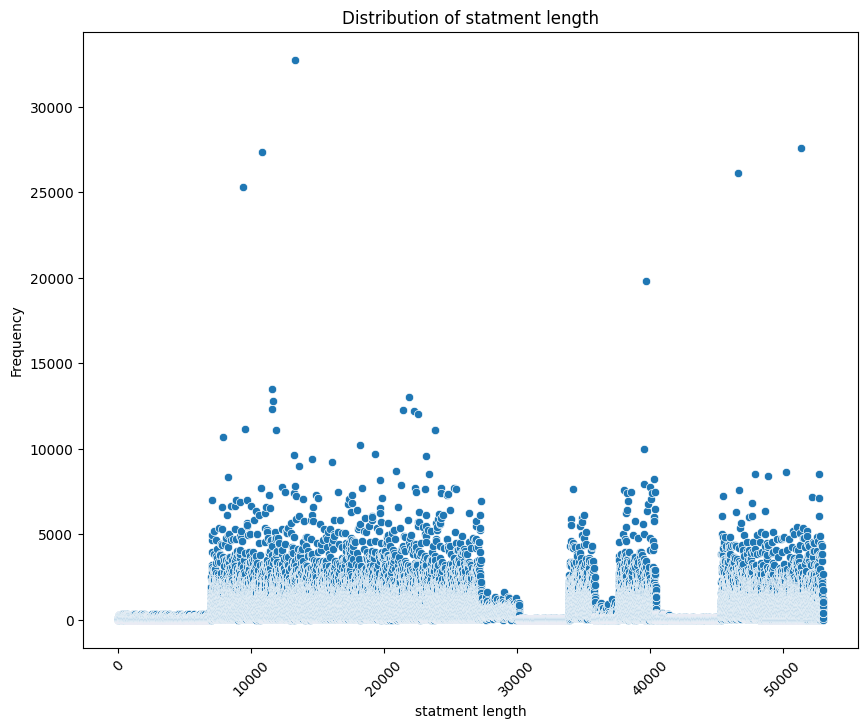

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

df_filtered = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]

print(f"Shape of original dataframe: {df.shape}")
print(f"Shape of filtered dataframe (after removing outliers): {df_filtered.shape}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df_filtered)
plt.title('Boxplot of Statement Length by Status (Outliers Removed)')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

df = df_filtered

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post        7424 non-null   object
 1   label       7424 non-null   object
 2   pernyataan  7424 non-null   object
dtypes: object(3)
memory usage: 174.1+ KB


In [20]:
df1.duplicated().sum()

np.int64(0)

In [21]:
df1.nunique()

,0
post,7424
label,2
pernyataan,7421


In [22]:
df1['label'].value_counts()

,count
label,
anxiety,4822
stress,2602


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49169 entries, 0 to 49168
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   statement             49169 non-null  object
 1   status                49169 non-null  object
 2   statement_length      49169 non-null  int64 
 3   statement_cleaned     49144 non-null  object
 4   statement_translated  48715 non-null  object
 5   statement_stemming    48715 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [24]:
df2.duplicated().sum()

np.int64(1474)

In [25]:
df2.nunique()

,0
statement,47679
status,7
statement_length,1756
statement_cleaned,47488
statement_translated,46292
statement_stemming,46121


In [26]:
df2['status'].value_counts()

,count
status,
Normal,16343
Depression,13750
Suicidal,9686
Anxiety,3497
Stress,2492
Bipolar,2451
Personality disorder,950


### Data Pre-Processing

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

,0
statement,0
status,0
statement_length,0


In [28]:
df1.columns = ['statement', 'status','statement_translated']
df1

,statement,status,statement_translated
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...
...,...,...,...
7419,really want kill myselfim questioning long ter...,stress,Benar -benar ingin membunuh diri saya sendiri ...
7420,girlfriend keeps making comments redflagdear r...,anxiety,Pacar terus membuat komentar Redflagdear RSW P...
7421,running optionsmy life general going downhill ...,anxiety,Pilihan berjalan saya kehidupan umum menuruni ...
7422,need support dealing lot stupid shit piling ag...,stress,Butuh dukungan berurusan banyak hal bodoh yang...


In [29]:
df2 = df2.drop('statement_cleaned',axis=1)
df2 = df2.drop('statement_stemming',axis=1)
df2

,statement,status,statement_length,statement_translated
0,oh my gosh,Anxiety,10,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,kesulitan tidur bingung pikiran gelisah hati lagu
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,salah mundur sayang keraguan tinggal gelisah g...
3,I've shifted my focus to something else but I'...,Anxiety,61,mengalihkan fokusku khawatir
4,"I'm restless and restless, it's been a month n...",Anxiety,72,im gelisah gelisah sebulan anak laki laki maks...
...,...,...,...,...
49164,Lorazepam side effect/after effect In the last...,Anxiety,784,efek samping lorazepam efek samping minggu men...
49165,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,keegoisan dunia berpikir teman teman bahagia i...
49166,Is there any way to sleep better? I can't slee...,Anxiety,85,tidur tidur obat malam membantu
49167,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,tips berbicara publik hi presentasi kerja ming...


In [30]:
df_translate = pd.concat([df1,df2], ignore_index=True)
df_translate['status'] = df_translate['status'].str.lower()
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,NaN
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,NaN
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,NaN
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,NaN
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,NaN
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,784.0
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,1012.0
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,85.0
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,401.0


In [31]:
df_translate[['statement', 'statement_translated']] = df_translate[['statement', 'statement_translated']].astype(str)
df_translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56593 entries, 0 to 56592
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   statement             56593 non-null  object 
 1   status                56593 non-null  object 
 2   statement_translated  56593 non-null  object 
 3   statement_length      49169 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [32]:
df_translate['statement_length'] = df_translate['statement_translated'].fillna('').apply(len)
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,928
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,1037
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


In [33]:
def clean_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.twitter.com\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'-', ' ', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text.lower()
def remove_stopwords(text, exclude_words=[]):
       # Handle float values
       if isinstance(text, float):
           text = str(text)  # Convert float to string
       tokens = word_tokenize(text.lower())
       filtered_tokens = [token for token in tokens if token not in stopwords.words('indonesian') or token in exclude_words]
       processed_text = ' '.join(filtered_tokens)
       return processed_text

def stemming(text, exclude_words=[]):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = word_tokenize(text)
  stemmed_words = [word if word in exclude_words else stemmer.stem(word) for word in words]
  stemmed_text = " ".join(stemmed_words)
  return stemmed_text

In [34]:
df_translate['statement_translated'] = df_translate['statement_translated'].apply(clean_text)

In [35]:
df_translate.to_csv('/content/capston-dataset-fix')
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,saran tolong hei semuanya tolong bantu saya sa...,928
1,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,ocd membanjiri saya ocdsaya merasa tidak mungk...,1037
3,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,kecemasan sosial saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


In [36]:
df_translate = pd.read_csv('/content/capston-dataset-fix')
df_translate = df_translate.drop('Unnamed: 0',axis = 1)
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,saran tolong hei semuanya tolong bantu saya sa...,928
1,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,ocd membanjiri saya ocdsaya merasa tidak mungk...,1037
3,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,kecemasan sosial saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


In [37]:
df_translate['statement_stemming'] = df_translate['statement_translated'].apply(remove_stopwords)

In [38]:
numeric_cols_data = df_translate.select_dtypes(include=['number']).columns.tolist()
# Fungsi detect_outliers_iqr tetap sama
def detect_outliers_iqr(df, features):
    outlier_summary = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_summary[col] = outliers
    return pd.Series(outlier_summary)

print("Outlier count in data:")
print(detect_outliers_iqr(df_translate, numeric_cols_data))

Outlier count in data:
statement_length    3371
dtype: int64


In [39]:
# Menghapus outlier pada setiap fitur yang dipilih menggunakan metode IQR
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for col in features:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.reset_index(drop=True)

df_translate = remove_outliers_iqr(df_translate, numeric_cols_data)

print("Data without outliers: ", df_translate.shape)

print("Jumlah status:")
df_translate['status'].value_counts()

Data without outliers:  (53222, 5)
Jumlah status:


,count
status,
normal,16342
depression,13703
suicidal,9652
anxiety,6143
stress,3996
bipolar,2439
personality disorder,947


In [40]:
statuses_to_keep = ['depression', 'anxiety', 'stress', 'normal']
df_translate = df_translate[df_translate['status'].isin(statuses_to_keep)]
print(df_translate['status'].value_counts())
print(df_translate.isna().sum())

status
normal        16342
depression    13703
anxiety        6143
stress         3996
Name: count, dtype: int64
statement                 0
status                    0
statement_translated    438
statement_length          0
statement_stemming        0
dtype: int64


In [41]:
df_translate.dropna(inplace = True)
print(df_translate.isna().sum())

statement               0
status                  0
statement_translated    0
statement_length        0
statement_stemming      0
dtype: int64


In [42]:
df_translate.to_csv('/content/capstone-dataset-fix-stemming')

In [44]:
df_translate = pd.read_csv('/content/capstone-dataset-fix-stemming.csv')
df_translate = df_translate.drop('Unnamed: 0',axis = 1)
df_translate[['statement_stemming']] = df_translate[['statement_stemming']].astype(str)
df_translate

,statement,status,statement_translated,statement_length,statement_stemming
0,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307,adakah cemas lupa cemas cemas mencoba judulnya...
1,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638,terkuras kelelahan lelah serangan panik kecema...
2,help with constant fatigue ever since i start...,stress,bantuan dengan kelelahan konstan sejak saya mu...,610,bantuan kelelahan konstan menderita gad panic ...
3,panic attacks when trying to sleep me 10m have...,stress,serangan panik ketika mencoba tidur saya m bar...,433,serangan panik mencoba tidur m mengalami seran...
4,anxiety help hello so i have maybe had like 3 ...,anxiety,kecemasan membantu halo jadi saya mungkin memi...,362,kecemasan membantu halo memiliki serangan pani...
...,...,...,...,...,...
39741,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322,efek samping lorazepam efek samping minggu men...
39742,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621,keegoisan dunia berpikir teman teman bahagia i...
39743,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31,tidur tidur obat malam membantu
39744,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158,tips berbicara publik hi presentasi kerja ming...


### Data Preparation

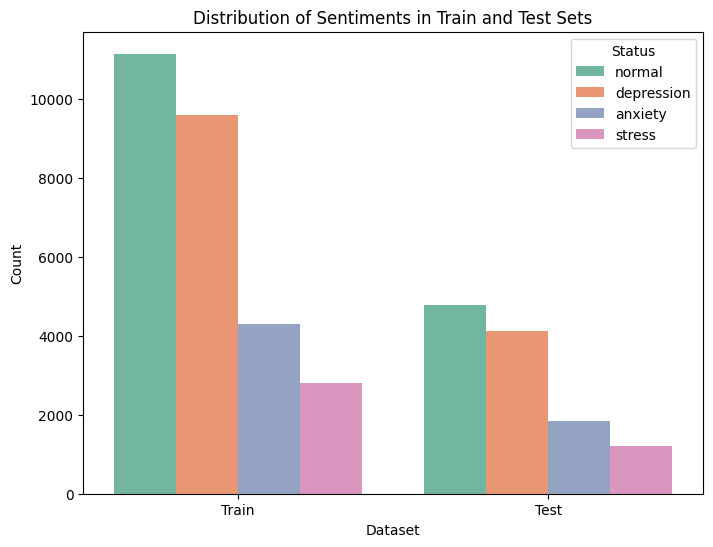

In [45]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in strat_split.split(df_translate['statement_stemming'], df_translate['status']):
    X_train, X_test = df_translate['statement_stemming'].iloc[train_index], df_translate['statement_stemming'].iloc[test_index]
    y_train, y_test = df_translate['status'].iloc[train_index], df_translate['status'].iloc[test_index]

data = {
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test),
    'Status': list(y_train) + list(y_test)
}

df_visualization = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.countplot(x='Set', hue='Status', data=df_visualization, palette='Set2')
plt.title('Distribution of Sentiments in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [46]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

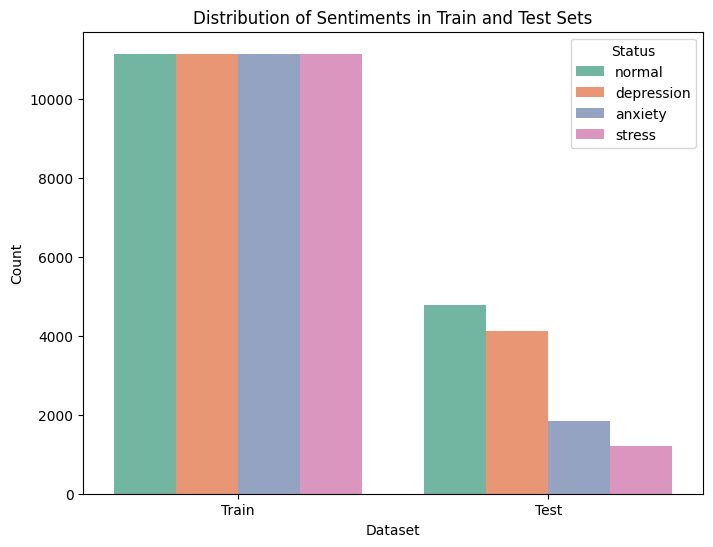

In [47]:
data = {
    'Set': ['Train'] * len(y_train_smote) + ['Test'] * len(y_test),
    'Status': list(y_train_smote) + list(y_test)
}

df_visualization = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.countplot(x='Set', hue='Status', data=df_visualization, palette='Set2')
plt.title('Distribution of Sentiments in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [48]:
# Misal: df berisi 2 kolom utama: "text" dan "label"
X = df_translate['statement_stemming']              # Fitur teks
y = df_translate['status']             # Label emosi/sentimen

# Split: 80% train, 20% test (stratify agar distribusi label seimbang)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [49]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_lstm)
y_test_encoded = label_encoder.transform(y_test_lstm)

In [50]:
# Tokenizer dan padding seperti sebelumnya
tokenizer_lstm = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer_lstm.fit_on_texts(X_train_lstm)

X_train_seq = tokenizer_lstm.texts_to_sequences(X_train_lstm)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test_lstm)

max_sequence_length = 777  # atau sesuai panjang rata-rata teksmu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [51]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

# Konversi ke dictionary
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: np.float64(1.6179523712599226), 1: np.float64(0.7254060960029203), 2: np.float64(0.6245285983658077), 3: np.float64(2.4863934939005317)}


### Modelling

##### SVM

In [ ]:
start_time = time.time()

# Define the parameter grid
param_grid = {
    'C': [0.1,1,10],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf'],
}
# Create GridSearchCV object
grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=10.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=12.1min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=12.0min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=11.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=11.2min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 6.2min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 9.9min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=12.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=11.7min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=13.7min
[CV] END ........................C=10, gamma=0.1

In [52]:
svm_model = SVC(kernel='rbf', gamma=1, C=10)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions
svm_predictions = svm_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Akurasi (SVM): {accuracy * 100:.0f}%")
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_predictions))

Akurasi (SVM): 83%

Classification Report (SVM):
               precision    recall  f1-score   support

     anxiety       0.79      0.74      0.77      1843
  depression       0.82      0.88      0.84      4109
      normal       0.88      0.93      0.90      4773
      stress       0.67      0.44      0.53      1199

    accuracy                           0.83     11924
   macro avg       0.79      0.75      0.76     11924
weighted avg       0.82      0.83      0.83     11924



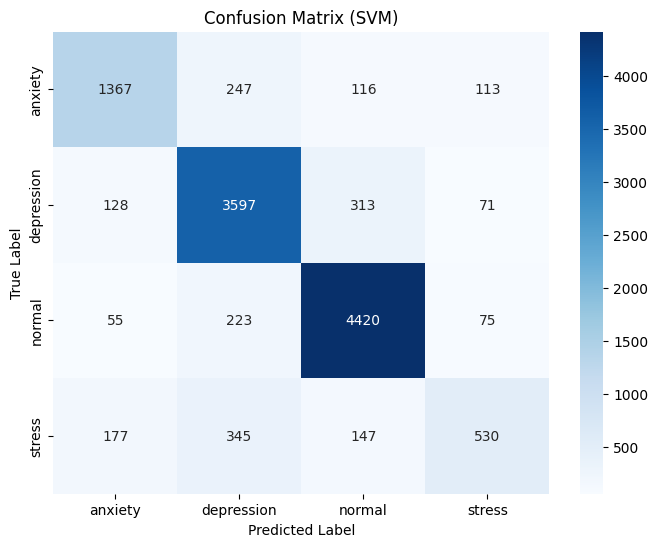

In [53]:
unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, svm_predictions, labels=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### LSTM

In [54]:
# Build LSTM model
n_classes = len(np.unique(y_train_encoded))

model_lstm = Sequential([
    Input(shape=(max_sequence_length,)),
    Embedding(input_dim=5000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 777, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,332 (2.85 MB)

 Trainable params: 747,332 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-5, verbose=1)


history = model_lstm.fit(
    X_train_pad, y_train_encoded,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6311 - loss: 1.0110
Epoch 1: val_accuracy improved from -inf to 0.80362, saving model to best_lstm_model.h5


795/795 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.6312 - loss: 1.0108 - val_accuracy: 0.8036 - val_loss: 0.5796 - learning_rate: 0.0010
Epoch 2/15
794/795 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8252 - loss: 0.6200
Epoch 2: val_accuracy did not improve from 0.80362
795/795 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.8252 - loss: 0.6199 - val_accuracy: 0.7992 - val_loss: 0.5656 - learning_rate: 0.0010
Epoch 3/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8624 - loss: 0.4866
Epoch 3: val_accuracy did not improve from 0.80362
795/795 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.8624 - loss: 0.4866 - val_accuracy: 0.7962 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 4/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8854 - loss: 0.4011
Epoch 4: val_accuracy improved from 0.80362 to 0.81274, saving model to best_lstm_model.h5


795/795 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.8854 - loss: 0.4011 - val_accuracy: 0.8127 - val_loss: 0.5627 - learning_rate: 0.0010
Epoch 5/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9001 - loss: 0.3426
Epoch 5: val_accuracy improved from 0.81274 to 0.81651, saving model to best_lstm_model.h5


795/795 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9001 - loss: 0.3427 - val_accuracy: 0.8165 - val_loss: 0.6083 - learning_rate: 0.0010
Epoch 6/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9166 - loss: 0.2940
Epoch 6: val_accuracy did not improve from 0.81651

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
795/795 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9166 - loss: 0.2940 - val_accuracy: 0.8042 - val_loss: 0.6337 - learning_rate: 0.0010
Epoch 7/15
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9320 - loss: 0.2319
Epoch 7: val_accuracy improved from 0.81651 to 0.81667, saving model to best_lstm_model.h5


795/795 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9320 - loss: 0.2319 - val_accuracy: 0.8167 - val_loss: 0.7096 - learning_rate: 3.0000e-04


249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8062 - loss: 0.5658
Test Accuracy: 81.67%
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step

Classification Report (LSTM):
               precision    recall  f1-score   support

     anxiety       0.72      0.79      0.75      1229
  depression       0.87      0.80      0.83      2740
      normal       0.92      0.89      0.91      3182
      stress       0.50      0.61      0.55       799

    accuracy                           0.82      7950
   macro avg       0.75      0.77      0.76      7950
weighted avg       0.83      0.82      0.82      7950



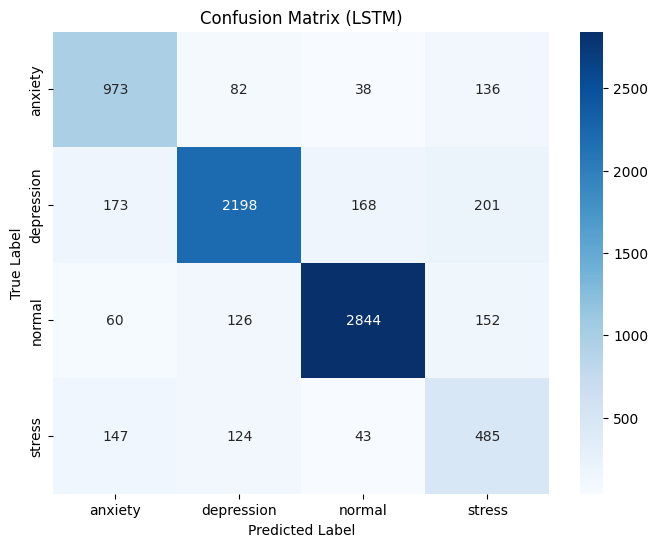

In [56]:
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Prediksi dan laporan evaluasi
pred_probs = model_lstm.predict(X_test_pad)
pred_classes = pred_probs.argmax(axis=1)
rnn_predictions = label_encoder.inverse_transform(pred_classes)

# Classification Report
print("\nClassification Report (LSTM):\n", classification_report(y_test_lstm, rnn_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test_lstm, rnn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

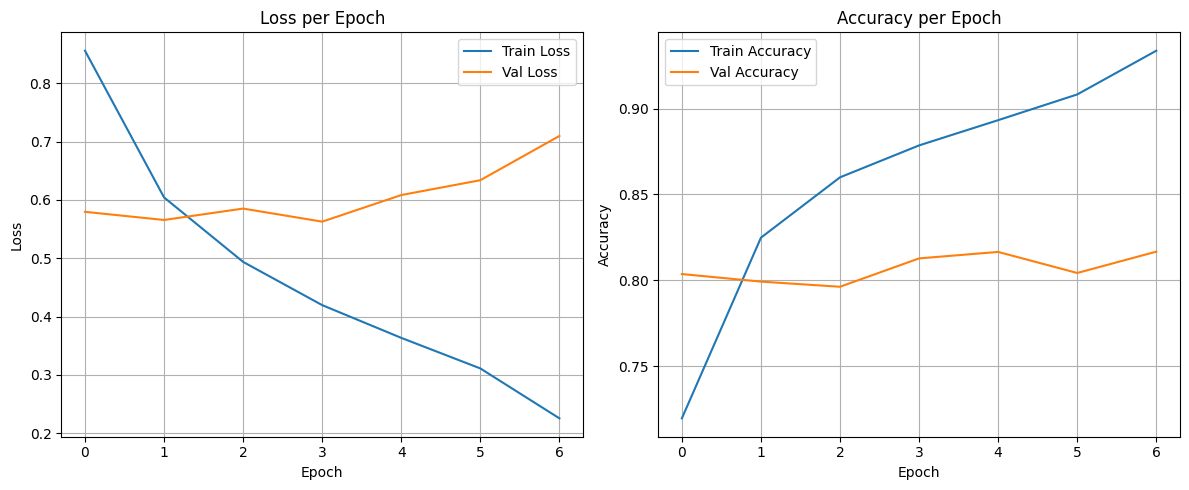

In [57]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Inference Model

##### SVM

In [58]:
def test_model(model, vectorizer, test_data):
    test_data_vectorized = vectorizer.transform(test_data)
    predictions = model.predict(test_data_vectorized)
    return predictions

user_input = "kadang aku takut banget sama masa depan takut nanti gabisa jadi apa apa takut nyusahin orang tua takut diremehin orang lain aku pengen bunuh dari aja"

# Make prediction
prediction = test_model(svm_model, vectorizer, [user_input])[0]
# Print the prediction
print(f"Prediksi sentimen (SVM): {prediction}")

print(f"teks: {user_input}")

Prediksi sentimen (SVM): depression
teks: kadang aku takut banget sama masa depan takut nanti gabisa jadi apa apa takut nyusahin orang tua takut diremehin orang lain aku pengen bunuh dari aja


In [59]:
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

##### LSTM

In [60]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
# Simpan tokenizer ke file
with open('tokenizer_lstm.pkl', 'wb') as f:
    pickle.dump(tokenizer_lstm, f)

In [61]:
def predict_emotion(text, model, tokenizer, label_encoder, max_len=777):
    # Preprocessing teks
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Prediksi
    probs = model.predict(pad)[0]  # hasil softmax
    pred_class = np.argmax(probs)
    label = label_encoder.inverse_transform([pred_class])[0]
    confidence = probs[pred_class] * 100

    return {
        "text": text,
        "predicted_label": label,
        "confidence": round(confidence, 2),
        "probabilities": dict(zip(label_encoder.classes_, map(lambda x: round(x*100, 2), probs)))
    }

In [ ]:
model1 = load_model('best_lstm_model.h5')
with open('tokenizer_lstm.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)

# Prediksi
example_text = "aku baik baik saja aku kuat namun aku sering merasa sedih dan menangis secara tiba-tiba tanpa sebab jingga ingin bunuh diri dan mengakhiri hidup"
result = predict_emotion(example_text, model1, loaded_tokenizer, label_encoder)

# Output
print(f"Teks: {result['text']}")
print(f"Prediksi Emosi: {result['predicted_label']} ({result['confidence']}%)")
print("Probabilitas Semua Kelas:")
for k, v in result["probabilities"].items():
    print(f"  {k}: {v}%")

1/1 [==============================] - 1s 996ms/step
Teks: aku baik baik saja aku kuat namun aku sering merasa sedih dan menangis secara tiba-tiba tanpa sebab jingga ingin bunuh diri dan mengakhiri hidup
Prediksi Emosi: anxiety (54.66%)
Probabilitas Semua Kelas:
  anxiety: 54.66%
  depression: 11.1%
  normal: 20.63%
  stress: 13.61%
